### 
### This notebook to configure the preprocessing and cleanup of the dataset
### 

In [1]:
### 
### Import libraries
### 

try:
    import numpy as np
    import pandas as pd
    import bz2
    import re
    import os
    import gc

    import matplotlib.pyplot as plt
    import seaborn as sns

    from nltk.corpus import stopwords
    from nltk.classify import SklearnClassifier

    import os
    import shutil
    import tarfile
    import zipfile

except:
    print('Error loading required libraries. Please check requirements.txt to make sure you have the required dependencies!')
    print('Program will exit. Dependencies required to work.')

In [2]:
### 
### Connecting to Kaggle, downloading and extracting the dataset
### 

try: 
    if os.path.exists('input/test.ft.txt.bz2') and os.path.exists('input/train.ft.txt.bz2'):
        print("Dataset already downloaded!")
    else:
        os.environ['KAGGLE_USERNAME'] = "mohammadfirassada"
        os.environ['KAGGLE_KEY'] = "84da0e8dfc70bbf9b3630874156f12f9"

        !kaggle datasets download -d bittlingmayer/amazonreviews
        shutil.move('amazonreviews.zip', 'input/amazonreviews.zip')
        with zipfile.ZipFile('input/amazonreviews.zip', 'r') as zip_ref:
            zip_ref.extractall('input/')
    os.remove('input/amazonreviews.zip')
except:
    print('Error downloading and extracting the dataset.\nPlease make sure you have all the requirements in requirements.txt\nThe program will continue...\nPlease make sure you have the dataset extracted and ready in the "input" folder.')

Dataset already downloaded!
Error downloading and extracting the dataset.
Please make sure you have all the requirements in requirements.txt
The program will continue...
Please make sure you have the dataset extracted and ready in the "input" folder.


In [3]:
### 
### Loading the dataset
### 

print('Loading the bz2 files. This may take a few minutes.')

train_file = bz2.BZ2File('input/train.ft.txt.bz2')
test_file = bz2.BZ2File('input/test.ft.txt.bz2')


train_file_lines = train_file.readlines()
test_file_lines = test_file.readlines()



Loading the bz2 files. This may take a few minutes.


In [4]:
print('Training data length:' ,len(train_file_lines))
print('Testing data length:' ,len(test_file_lines))
print('The ratio is: ', len(train_file_lines)//len(test_file_lines),':1', sep = '')

Training data length: 3600000
Testing data length: 400000
The ratio is: 9:1


In [5]:
### 
### The assignment asks for a 80/20 split, therefore, we combine the two sets and split them later
### 

dataset = train_file_lines + test_file_lines
len(dataset)

4000000

In [6]:
dataset[0]

b'__label__2 Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^\n'

In [7]:
### 
### Data preparation: decode and extract labels
### 

dataset = [x.decode('utf-8') for x in dataset]

In [8]:
dataset[0]

'__label__2 Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^\n'

In [9]:
dataset_labels = [0 if x.split(' ')[0] == '__label__1' else 1 for x in dataset]

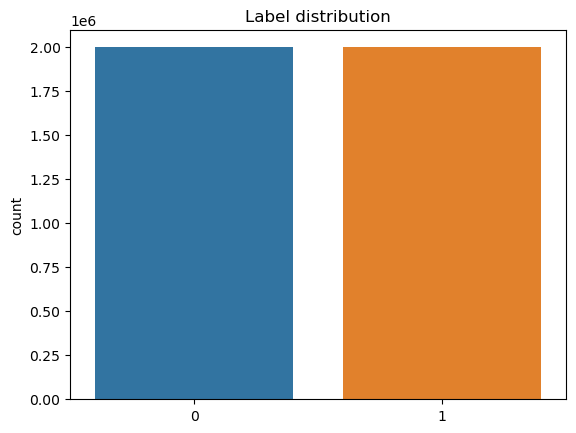

In [10]:
sns.countplot(x= dataset_labels)
plt.title('Label distribution')
plt.show()

In [11]:
### 
### Data preparation: extract taining data
### 

dataset = [x.split(' ', 1)[1][:-1] for x in dataset]

In [12]:
print(dataset[0])

Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^


Text(0.5, 1.0, 'Word Frequency Distribution')

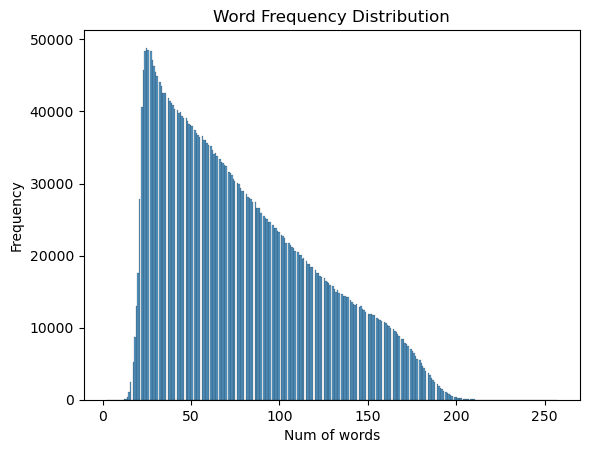

In [13]:
sentences_size = list(map(lambda x: len(x.split()), dataset))
sns.histplot(sentences_size)
plt.xlabel("Num of words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution")

In [14]:
### 
### Data preparation: cleaning out URLs
### 

for i in range(len(dataset)):
    if 'www.' in dataset[i] or 'http:' in dataset[i] or 'https:' in dataset[i] or '.com' in dataset[i]:
        dataset[i] = re.sub(r"([^ ]+(?<=\.[a-z]{3}))", "<url>", dataset[i])

In [15]:
list(filter(lambda x: '<url>' in x, dataset))[0]

"Bad Deal!!: I ordered this DVD and received a substitute I never received the DVD I ordered from Importcds (the Vendor). I contacted them and did not recieve any feedback. I can't rate a DVD I have never seen. I didn't bother to send it back because it would have cost me more that I orginally paid for it. In the future I will watch for the name of the person and/or persons I am buying from. I thought they were a good company. I understand a simple mistake but, to not get a response at all is not good businees sense. I spend hundreds of dollars a month on <url> building my DVD collection. I guess I will be more careful in the future."

In [ ]:
### 
### Data preprocessing: lowercasing
### 


import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')
nltk.download('punkt')

# Define the stop words to be removed
stop_words = set(stopwords.words('english'))

# Initialize the Porter stemmer
stemmer = PorterStemmer()

# Loop through each document in the dataset
for i in range(len(dataset)):
    # Lowercase the document
    dataset[i] = dataset[i].lower()
    
    # Tokenize the document into individual words
    words = nltk.word_tokenize(dataset[i])
    
    # Remove the stop words from the list of words
    words = [word for word in words if word not in stop_words]
    
    # Stem each word using the Porter stemmer
    words = [stemmer.stem(word) for word in words]
    
    # Join the list of words back into a single string
    dataset[i] = ' '.join(words)

[nltk_data] Downloading package stopwords to /home/firas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/firas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
### 
### Data preprocessing: removing stop words
###
dataset[0]

In [ ]:
### 
### Data preprocessing: stemming
###